In [1]:
import numpy as np

In [17]:
! sudo chown -R sschneider:bethgelab log

In [18]:
! mv log/20180918-192507_AdversarialDropoutSolver log-compare
! mv log/20180918-192955_VADASolver log-compare
! mv log/20180918-193639_DANNSolver log-compare
! mv log/20180918-194109_AssociativeSolver log-compare
! mv log/20180918-194423_DeepCoralSolver log-compare
! mv log/20180918-194732_DeepLogCoralSolver log-compare
! mv log/20180918-195609_CorrDistanceSolver log-compare
! mv log/20180918-200434_SelfEnsemblingSolver log-compare

/usr/local/lib/python3.6/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


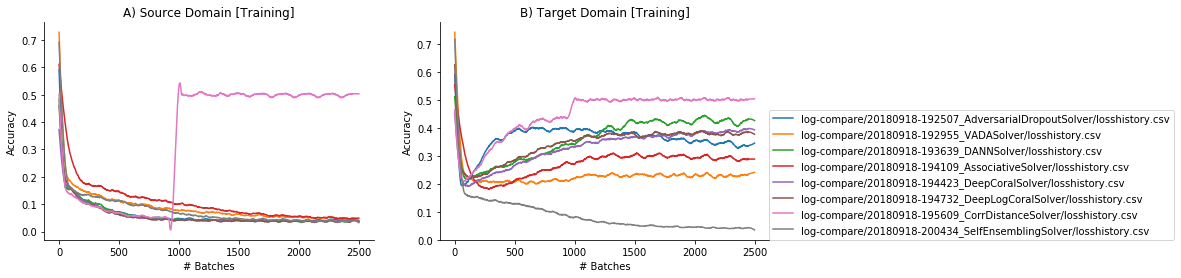

In [54]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import re

import seaborn as sns

%matplotlib inline

filt = lambda x:savgol_filter(x, window_length=101, polyorder=2)

fig, (ax_s, ax_t) = plt.subplots(1,2,figsize=(13,4))

for fname in sorted(glob.glob('log-compare/2018*/losshistory.csv')):
    
    df = pd.read_csv(fname)
    
    ax_s.plot(1.-filt(df.acc_s[:2500]), label = fname)
    ax_t.plot(1.-filt(df.acc_t[:2500]), label = fname)
    
    ax_s.set_title("A) Source Domain [Training]")
    ax_t.set_title("B) Target Domain [Training]")
    
    for ax in [ax_s, ax_t]:
        ax.set_xlabel('# Batches')
        ax.set_ylabel('Accuracy')

sns.despine()
plt.legend(loc = (1,0))
plt.show()